<a href="https://colab.research.google.com/github/BARURISAIAVINASH/AVINASH_datascience/blob/BARURISAIAVINASH-patch-1/Performance_metrics_Instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compute performance metrics for the given Y and Y_score without sklearn

In [ ]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
# write your code here
data=pd.read_csv('5_a.csv')

In [ ]:
y_hat_p=list(data['proba'].values)

In [ ]:
p=0
for i in range(len(y_hat)):
  if y_hat[i]<0.5:
    #print(i)
    p=p+1
p

0

In [ ]:
y_hat=[]
for i in y_hat_p:
  if i>=0.5:
    y_hat.append(1)
  else:
    y_hat.append(0)


In [ ]:
data['proba']=y_hat

In [ ]:
data

,y,proba
0,1.0,1
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
10095,1.0,1
10096,1.0,1
10097,1.0,1
10098,1.0,1


In [ ]:
y=list(data['y'].values)

In [ ]:
len(y_hat)

10100

In [ ]:
##TP(11)
TP=0
for i in range(len(y)):
  if y[i]==1 and y_hat[i]==1:
    TP=TP+1
print(TP)


10000


In [ ]:
##01
FP=0
for i in range(len(y)):
  if y[i]==0 and y_hat[i]==1:
    FP=FP+1
print(FP)


100


In [ ]:
#FN10
FN=0
for i in range(len(c)):
  if y[i]==1 and y_hat[i]==0:
    FN=FN+1
print(FN)

0


In [ ]:
#TN
TN=0
for i in range(len(c)):
  if y[i]==0 and y_hat[i]==0:
    TN=TN+1
print(TN)

0


In [ ]:
#confusion_matrix=[]
q = [ [ None for i in range(2) ] for j in range(2) ]

In [ ]:
q[0][0]=10000
q[0][1]=100
q[1][0]=0
q[1][1]=0

In [ ]:
q

[[10000, 100], [0, 0]]

In [ ]:
##recall
recall=TP/(TP+FN)
recall

1.0

In [ ]:
precision=TP/(TP+FP)
precision

0.9900990099009901

In [ ]:
F1_score=(2*recall*precision)/(precision+recall)
F1_score

0.9950248756218906

In [ ]:
accuracy_score=(TP+TN)/(TP+TN+FP+FN)
accuracy_score

0.9900990099009901

In [ ]:
###AUC

In [ ]:
T=set(y_hat_p)




In [ ]:
len(T)

10100

In [ ]:
T=y_hat_p[0:10]

In [ ]:
T=np.sort(T)

In [ ]:
T

array([0.56701207, 0.60160022, 0.63516504, 0.63738662, 0.6502303 ,
       0.66632258, 0.72456423, 0.76658559, 0.82934555, 0.8891988 ])

In [ ]:
##TP(11)
TPR_f=[]
FPR_f=[]
for i in T:
  k=[]
  for j in y_hat_p:
    if j>i:
      k.append(1)
    else:
      k.append(0)
  TP=0
  for i in range(len(y)):
      if y[i]==1 and k[i]==1:
        TP=TP+1
  #print(TP)
  
  FP=0
  for i in range(len(y)):
    if y[i]==0 and k[i]==1:
      FP=FP+1
  #print(FP)
  FN=0
  for i in range(len(y)):
    if y[i]==1 and k[i]==0:
      FN=FN+1
  #print(FN)
  
  #TN
  TN=0
  for i in range(len(y)):
    if y[i]==0 and k[i]==0:
      TN=TN+1
  #print(TN)
  TPR=(TP)/(TP+FN)
  FPR=(FP)/(FP+TN)
  TPR_f.append(TPR)
  FPR_f.append(FPR)


In [ ]:
TPR_f

[0.8311,
 0.7461,
 0.6603,
 0.6544,
 0.6212,
 0.5799,
 0.4273,
 0.3173,
 0.1686,
 0.0255]

In [ ]:
FPR_f

[0.86, 0.78, 0.67, 0.66, 0.61, 0.59, 0.45, 0.3, 0.18, 0.03]

In [ ]:
TPR_f=list(np.sort(TPR_f))

In [ ]:
FPR_f=list(np.sort(FPR_f))

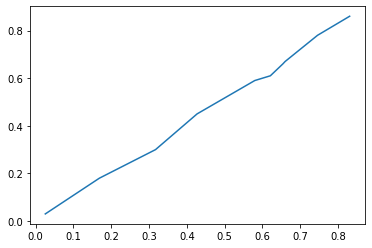

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(TPR_f,FPR_f)

In [ ]:
pAUC = np.trapz(TPR_f, FPR_f)

In [ ]:
pAUC

0.360975

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
# write your code

In [ ]:
data=pd.read_csv('5_b.csv')

In [ ]:
data

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648
...,...,...
10095,0.0,0.474401
10096,0.0,0.128403
10097,0.0,0.499331
10098,0.0,0.157616


In [ ]:
p=0
for i in range(len(a)):
  if a[i]<0.5:
    print(i)
    p=p+1
p

0

In [ ]:
a=list(data['proba'].values)

In [ ]:
b=[]
for i in a:
  if i>=0.5:
    b.append(1)
  else:
    b.append(0)

In [ ]:
b

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
data['proba']=b

In [ ]:
c=list(data['y'].values)

In [ ]:
##TP(11)
TP=0
for i in range(len(c)):
  if c[i]==1 and b[i]==1:
    TP=TP+1
print(TP)


55


In [ ]:
##01
FP=0
for i in range(len(c)):
  if c[i]==0 and b[i]==1:
    FP=FP+1
print(FP)


239


In [ ]:
#FN10
FN=0
for i in range(len(c)):
  if c[i]==1 and b[i]==0:
    FN=FN+1
print(FN)

45


In [ ]:
#TN
TN=00
for i in range(len(c)):
  if c[i]==0 and b[i]==0:
    TN=TN+1
print(TN)

9761


In [ ]:
#confusion_matrix=[]
q = [ [ None for i in range(2) ] for j in range(2) ]

In [ ]:
q[0][0]=TP
q[0][1]=FP
q[1][0]=FN
q[1][1]=TN

In [ ]:
q

[[55, 239], [45, 9761]]

In [ ]:
##recall
recall=TP/(TP+FN)
recall

0.55

In [ ]:
precision=TP/(TP+FP)
precision

0.1870748299319728

In [ ]:
F1_score=(2*recall*precision)/(precision+recall)
F1_score

0.2791878172588833

In [ ]:
accuracy_score=(TP+TN)/(TP+TN+FP+FN)
accuracy_score

0.9718811881188119

In [ ]:
T=set(a)


In [ ]:
len(T)

10100

In [ ]:
T=a[0:10]

In [ ]:
T=np.sort(T)

In [ ]:
##TP(11)
TPR_f=[]
FPR_f=[]
for i in T:
  k=[]
  for j in a:
    if j>i:
      k.append(1)
    else:
      k.append(0)
    TP=0
  for i in range(len(c)):
      if c[i]==1 and k[i]==1:
        TP=TP+1
  #print(TP)
  
  FP=0
  for i in range(len(c)):
    if c[i]==0 and k[i]==1:
      FP=FP+1
  #print(FP)
  FN=0
  for i in range(len(c)):
    if c[i]==1 and k[i]==0:
      FN=FN+1
  #print(FN)
  
  #TN
  TN=0
  for i in range(len(c)):
    if c[i]==0 and k[i]==0:
      TN=TN+1
  #print(TN)
  TPR=(TP)/(TP+FN)
  FPR=(FP)/(FP+TN)
  TPR_f.append(TPR)
  FPR_f.append(FPR)

In [ ]:
TPR_f=TPR_f[:-1]

In [ ]:
FPR_f=FPR_f[:-1]

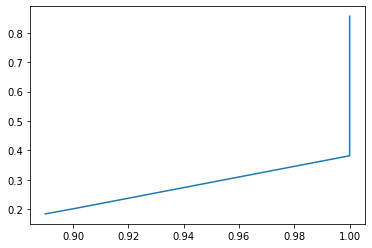

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(TPR_f,FPR_f)

In [ ]:
pAUC = np.trapz(TPR_f, FPR_f)

In [ ]:
pAUC

-0.6608689999999999

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [ ]:
 # write your code
data=pd.read_csv('5_c.csv')

In [ ]:
data

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579
...,...,...
2847,1,0.491663
2848,1,0.292109
2849,1,0.659161
2850,1,0.456265


In [ ]:
a=list(data['prob'].values)

In [ ]:
c=list(data['y'].values)

In [ ]:
len(a)

2852

In [ ]:
len(c)

2852

In [ ]:
T=set(a)

In [ ]:
len(T)

2791

In [ ]:
T=list(T)

In [ ]:
T=np.sort(T)

In [ ]:
##TP(11)

AA=[]
for i in T:
  k=[]
  for j in a:
    if j>i:
      k.append(1)
    else:
      k.append(0)
   
  
  FP=0
  for i in range(len(a)):
    if c[i]==0 and k[i]==1:
      FP=FP+1
  #print(FP)
  FN=0
  for i in range(len(c)):
    if c[i]==1 and k[i]==0:
      FN=FN+1
  #print(FN)
  A=(500*FN)+(100*FP)
  AA.append(A)
  #print(TN)
  

In [ ]:
len(AA)

2791

In [ ]:
len(T)

2791

In [ ]:
n=AA.index(max(AA))

In [ ]:
n

2790

In [ ]:
T[n]

0.9577467989277196

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [ ]:
data=pd.read_csv('5_d.csv')

In [ ]:
data

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0
...,...,...
157195,87.0,83.0
157196,97.0,86.0
157197,106.0,93.0
157198,105.0,101.0


In [ ]:
y=list(data['y'].values)

In [ ]:
y_hat=list(data['pred'].values)

In [ ]:
sum=0
for i in range(len(y)):
  sum=sum+(y[i]-y_hat[i])**2
mean_square_error=sum/len(y)


In [ ]:
mean_square_error

177.16569974554707

In [ ]:
############mape

In [ ]:
e=0
a=0
for i in range(len(y)):
  if y[i]-y_hat[i]<0:
    e=e+(-(y[i]-y_hat[i]))
  else:
    e=e+(y[i]-y_hat[i])
  a=a+y[i]
mape=e/a



In [ ]:
mape

0.1291202994009687

In [ ]:
###########r2

In [ ]:
sum=0
for i in range(len(y)):
  sum=sum+y[i]
mean=sum/len(y)

In [ ]:
mean


66.56208651399491

In [ ]:
z=0
x=0
for i in range(len(y)):
  z=z+(y[i]-mean)**2
for i in range(len(y_hat)):
  x=x+(y[i]-y_hat[i])**2
r2=1-(x/z)

In [ ]:
r2

0.9563582786990964